# Introduction

## Goal. 
The goal of this lab is to continue the investigations of Evolutionary Algorithms (EAs) we started in the previous module's exercises. In particular, you will observe the effects of **crossover**, **selection pressure**, and **population size** in artificial evolution, and reflect to what extent these observations also apply to biological evolution.

This lab continues the use of the *inspyred* framework for the Python programming language seen in the previous lab. If you did not participate in the previous lab, you may want to look that over first and then start this lab's exercises.

Note once again that, unless otherwise specified, in this module's exercises we will use real-valued genotypes and that the aim of the algorithms will be to *minimize* the fitness function $f(\mathbf{x})$, i.e. lower values correspond to a better fitness!

# Exercise 1

In this exercise we will analyze the **effect of crossover** in the EA. An offspring individual is formed from two parent individuals $\mathbf{x}_1$ and $\mathbf{x}_2$ by randomly taking the value for each entry $x_i$ either from $\mathbf{x}_1$ or $\mathbf{x}_2$. The EA has a parameter defining the fraction of offspring that is created using crossover at each generation (the remaining individuals are created via asexual reproduction).

To start the experiments, run the next cell$^{[1]}$.

This script executes $30$ runs using mutation only (as in the previous exercises), and $30$ runs using crossover only. The boxplots compare the best fitness values obtained in the two cases.

- Do you see any difference between the two results? Why?

---
[1]: 
For all the exercises in this lab you may set the seed for the pseudo-random number generator. This will allow you to reproduce your results. 


In [1]:
from pylab import *
from random import Random
from utils.utils_02.ga import run_ga
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 
from mpl_toolkits import mplot3d
from matplotlib import cm
!pip install ipywidgets
!pip install ipympl
!jupyter nbextension enable --py widgetsnbextension


[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
seed = 1563684

In [3]:
"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# parameters for the GA
args = {}
args["num_vars"] = 2 # Number of dimensions of the search space
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["tournament_size"] = 2 
args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["pop_size"] = 20 # population size
args["pop_init_range"] = [-10, 10] # Range for the initial population
args["max_generations"] = 50 # Number of generations of the GA

num_runs = 200 # Number of runs to be done for each condition 
display = False # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'


rng = Random(seed)

#-----------------------------
# ONLY MUTATION, NO CROSSOVER
#-----------------------------

crossover_rate = 0 # Crossover fraction    
mutation_rate = 1.0 # fraction of loci to perform mutation on

# run the GA *num_runs* times and record the best fits
best_fitnesses_mutation_only = [run_ga(rng, display=display, 
                                       crossover_rate=crossover_rate,
                                       mutation_rate=mutation_rate,
                                       **args)[1]
                                for _ in range(num_runs)]


rng = Random(seed)
best_guys_mutation_only = [run_ga(rng, display=display, 
                                       crossover_rate=crossover_rate,
                                       mutation_rate=mutation_rate,
                                       **args)[0]
                                for _ in range(num_runs)]


rng = Random(seed)
final_pops_mutation_only = [run_ga(rng, display=display, 
                                       crossover_rate=crossover_rate,
                                       mutation_rate=mutation_rate,
                                       **args)[2]
                                for _ in range(num_runs)]




#-----------------------------
# ONLY CROSSOVER, NO MUTATION
#-----------------------------

mutation_rate = 0.0 # fraction of loci to perform mutation on
crossover_rate = 1.0 # Crossover fraction  

# run the GA *num_runs* times and record the best fits 
best_fitnesses_crossover_only = [run_ga(rng, display=display, 
                                       crossover_rate=crossover_rate,
                                       mutation_rate=mutation_rate,
                                       **args)[1]
                                for _ in range(num_runs)]

best_guys_crossover_only = [run_ga(rng, display=display, 
                                       crossover_rate=crossover_rate,
                                       mutation_rate=mutation_rate,
                                       **args)[0]
                                for _ in range(num_runs)]


final_pops_crossover_only = [run_ga(rng, display=display, 
                                       crossover_rate=crossover_rate,
                                       mutation_rate=mutation_rate,
                                       **args)[2]
                                for _ in range(num_runs)]


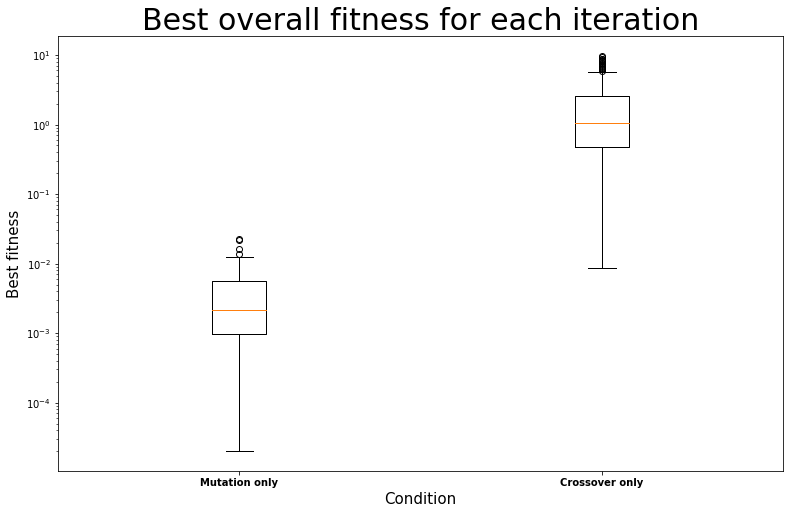

In [4]:
fig = figure(figsize=(13, 8))
ax = fig.gca()
ax.boxplot([best_fitnesses_mutation_only, best_fitnesses_crossover_only],
           notch=False)
ax.set_xticklabels(['Mutation only', 'Crossover only'], fontweight="bold")
ax.set_yscale('log')
ax.set_xlabel('Condition', fontsize=15)
ax.set_ylabel('Best fitness', fontsize=15)
ax.set_title("Best overall fitness for each iteration", fontsize=30)
plt.show()

In [5]:
x_mutation_only = []
y_mutation_only = []

x_crossover_only = []
y_crossover_only = []

for i in range(len(best_guys_mutation_only)):
    x_mutation_only.append(best_guys_mutation_only[i][0])
    y_mutation_only.append(best_guys_mutation_only[i][1])
    
for i in range(len(best_guys_crossover_only)):
    x_crossover_only.append(best_guys_crossover_only[i][0])
    y_crossover_only.append(best_guys_crossover_only[i][1])

Here it has been plotted the best overall individual for each of the $200$ iterations

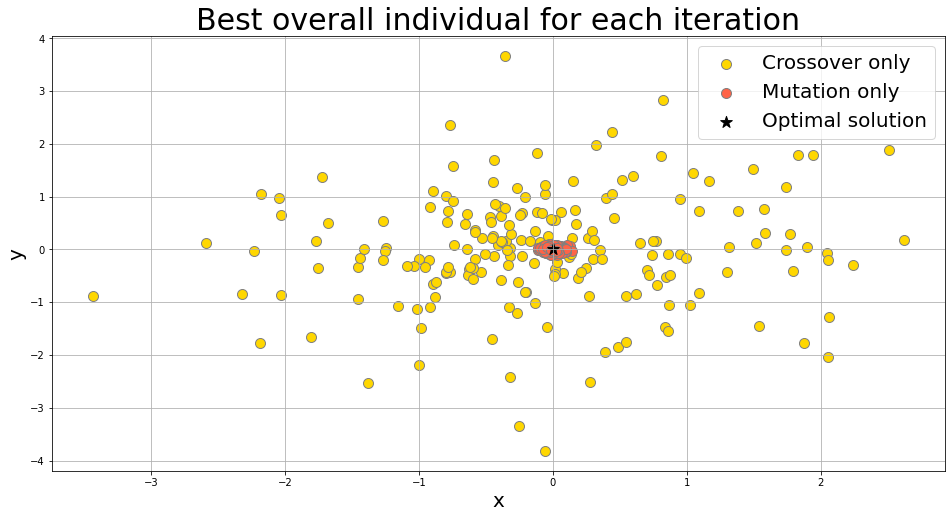

In [6]:
figure(figsize=(16, 8))

plt.grid()
plt.scatter(x_crossover_only, y_crossover_only, color="gold", edgecolor="gray", label = "Crossover only", s=100)
plt.scatter(x_mutation_only, y_mutation_only, color="tomato", edgecolor="gray", label = "Mutation only", s=100)
plt.scatter(0,0,marker='*', s=150, color="black", label ="Optimal solution")
plt.xlabel("x", fontsize="20")
plt.ylabel("y", fontsize="20")
plt.legend(loc="best", prop={'size': 20})
plt.title("Best overall individual for each iteration", fontsize=30)
plt.show()

This is a comparison of the best fitness (the fitness of the the best overall individual) over the $200$ iterations.

Text(20.75, 0.5, 'Best Fitness')

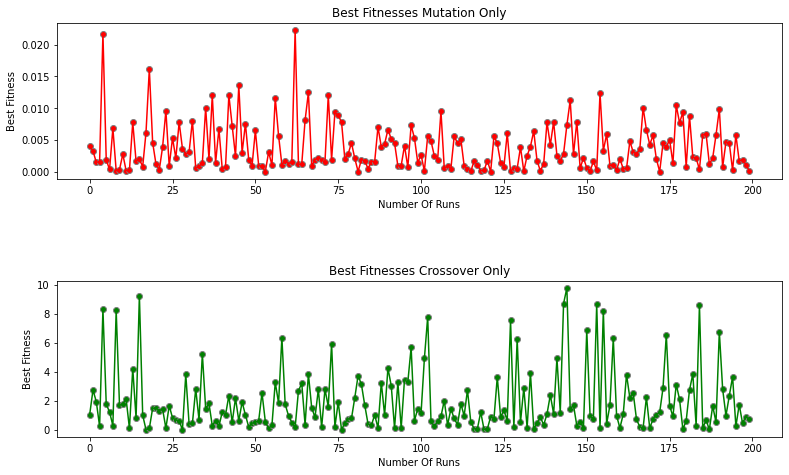

In [7]:
x = np.arange(0,200)
fig, axs = plt.subplots(2)
fig.tight_layout(pad=3.0)
fig.set_figheight(8)
fig.set_figwidth(13)


axs[0].scatter(x, best_fitnesses_mutation_only, color = "red",edgecolors="gray")
axs[0].plot(x, best_fitnesses_mutation_only,color = "red")
axs[0].set(title="Best Fitnesses Mutation Only")
axs[0].set_xlabel("Number Of Runs")
axs[0].set_ylabel("Best Fitness")

axs[1].plot(x, best_fitnesses_crossover_only, color = "green")
axs[1].scatter(x, best_fitnesses_crossover_only, color = "green",edgecolors="gray")
axs[1].set(title="Best Fitnesses Crossover Only")
axs[1].set_xlabel("Number Of Runs")
axs[1].set_ylabel("Best Fitness")

Mutation and crossover are two primary mechanisms that generate genetic diversity in a GA. The mutation operation randomly alters the existing genes of an individual, while crossover creates new combinations of genes by exchanging genetic material between two individuals. In GAs using only mutation, the genetic diversity comes from the random changes in the genes of the individuals, while in GAs using only crossover, the genetic diversity is generated through the exchange of genetic material between two individuals.


`Mutation is primarily used for exploration in a GA`, as it allows the algorithm to explore new regions of the search space by introducing new genetic material into the population. In contrast, `crossover is mainly used for exploitation`, as it helps to combine the existing genetic material of the population to create better solutions. In GAs using only mutation, the focus is on exploring the search space and finding new solutions, while in GAs using only crossover, the emphasis is on exploiting the existing genetic material of the population to create better solutions.


The convergence rate of a GA using only mutation may be slower than that of a GA using only crossover because mutation generates new solutions randomly, and it may take longer for the algorithm to find a good solution. In contrast, GAs using only crossover may converge faster as the algorithm combines the existing genetic material of the population to create better solutions.


Mutation-only GAs are well-suited to problems where the search space is highly complex or uncertain, and where there may be many local optima or multiple feasible solutions. By relying solely on mutation, the population can explore a wider range of the search space and potentially discover new and unexpected solutions that would be difficult to find through crossover alone. However, this approach can also be slow to converge towards the global optimum, since each new individual is only a small step away from its parent and the mutation operator may not always generate high-quality solutions.

Crossover-only GAs are well-suited to problems where the search space is relatively simple and the optimal solution is likely to be found within a narrow region. By relying solely on crossover, the population can quickly converge towards the best solution within this region and refine it through further crossover operations. However, this approach can also be vulnerable to premature convergence, where the population gets stuck in a local optimum and fails to explore other regions of the search space.

A combination of mutation and crossover in a traditional GA can help to balance these strengths and weaknesses. By using crossover to refine promising solutions and mutation to explore new regions of the search space, the population can maintain a balance between exploration and exploitation and avoid getting stuck in local optima. This approach is often effective for a wide range of optimization problems, but may require careful tuning of the crossover and mutation rates to achieve optimal performance.

Overall, the choice between mutation-only, crossover-only, or a combination of both approaches in a GA depends on the specific characteristics of the optimization problem, such as the complexity of the search space and the presence of local optima. By understanding the trade-off between exploration and exploitation, and the strengths and weaknesses of different GA approaches, it is possible to select an appropriate method for a particular problem and achieve efficient optimization.

# Exercise 2

In this exercise we will focus on the **effect of changing the fraction of offspring created using crossover** . Run the next cell to compare the best fitnesses obtained by varying this fraction (while using a fixed mutation probability of $0.5$, i.e. each loci of each genome will have a $50\%$ chance of being mutated). 

- Is there an optimal crossover fraction for this fitness function? Why?

In [8]:
from pylab import *
from random import Random
from utils.utils_02.ga import run_ga
import sys

"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

crossover_rates = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9] # Crossover fractions

# parameters for the GA
args = {}
args["num_vars"] = 10 # Number of dimensions of the search space
args["gaussian_stdev"] = 0.5 # Standard deviation of the Gaussian mutations
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on
args["tournament_size"] = 2 
args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["pop_size"] = 20 # population size
args["pop_init_range"] = [-10, 10] # Range for the initial population
args["max_generations"] = 50 # Number of generations of the GA

num_runs = 200 # Number of runs to be done for each condition
display = False # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'


rng = Random(seed)

# run the GA *num_runs* times for each crossover fraction 
# and record the best fits 
best_fitnesses = [[run_ga(rng, display=display, 
                          crossover_rate=crossover_rate,**args)[1] 
                    for _ in range(num_runs)]
                    for crossover_rate in crossover_rates]

Text(0.5, 1.0, 'Best overall fitness for each iteration')

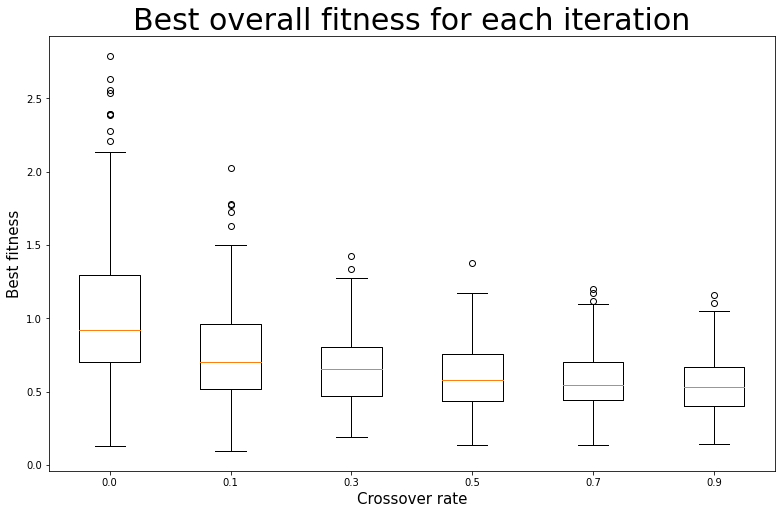

In [9]:
fig = figure(figsize=(13, 8))
ax = fig.gca()
ax.boxplot(best_fitnesses,notch=False)
ax.set_xticklabels(crossover_rates)
ax.set_xlabel('Crossover rate', fontsize=15)
ax.set_ylabel('Best fitness', fontsize=15)
ax.set_title("Best overall fitness for each iteration", fontsize=30)

`Crossover` is a genetic operator that is used to combine genetic material from two parent individuals to create new offspring individuals. The crossover operator is inspired by biological reproduction, where the genetic material of two parents is combined to produce offspring with a unique combination of genetic traits.

In a GA, the crossover operator is typically applied during the reproduction step, where pairs of parent individuals are selected from the population based on their fitness values. The crossover operator works by selecting one or more crossover points along the length of the parent chromosomes and exchanging genetic material between the parents at those points. The resulting offspring have a combination of genetic material from both parents.

The number and location of crossover points can vary depending on the specific implementation of the GA. In single-point crossover, a single crossover point is selected along the length of the chromosomes, and genetic material is exchanged between the parents at that point. In multiple-point crossover, two or more crossover points are selected, and genetic material is exchanged between the parents at those points. In uniform crossover, the genetic material is exchanged at each position in the chromosome with a fixed probability.

The choice of crossover operator and parameters can have a significant impact on the performance of the GA. Crossover can help to maintain genetic diversity in the population and prevent premature convergence to a suboptimal solution, but may also introduce new solutions that are less fit than their parent individuals. The optimal choice of crossover operator and parameters depends on the specific characteristics of the optimization problem, such as the complexity of the search space and the presence of local optima.

Overall, the crossover operator is an important component of genetic algorithms that allows for the creation of new offspring individuals with a unique combination of genetic traits. By combining the genetic material of two parent individuals, crossover can help to explore and exploit the search space, leading to better solutions to the optimization problem.

The `crossover rate` determines the frequency at which crossover is applied to the genetic material of the individuals in the population.
A low crossover rate means that there is less recombination between individuals in the population, which can lead to slower convergence, but may also help preserve diversity. On the other hand, a high crossover rate can lead to faster convergence, but can also increase the risk of premature convergence to suboptimal solutions.
From the boxplot above it's possible to notice that an higher value of crossover is better than a low one. 
For this particular problem, the best value is $0.7$, which shows the thiner distribution around the median, and also the the outlier are closer to the median with respect to the other case.

# Exercise 3

We will now investigate the **effect of the selection pressure**. In the previous exercises, we were using tournament selection with a tournament size of 2. Run the next cell to compare the best fitness values and the distances from the global optimum obtained using tournament sizes 2 and 10.

- Which tournament size gives better results for the fitness function sphere and why?
- Which tournament size is better for the fitness function __[Rastrigin](https://pythonhosted.org/inspyred/reference.html?highlight=rastrigin#inspyred.benchmarks.Rastrigin)__ (you can change the problem by changing the parameter `problem_class` in the script) and why?


In [10]:
from pylab import *
from random import Random
from utils.utils_02.ga import run_ga
from inspyred import benchmarks
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 
from ipywidgets import interactive

### Sphere function

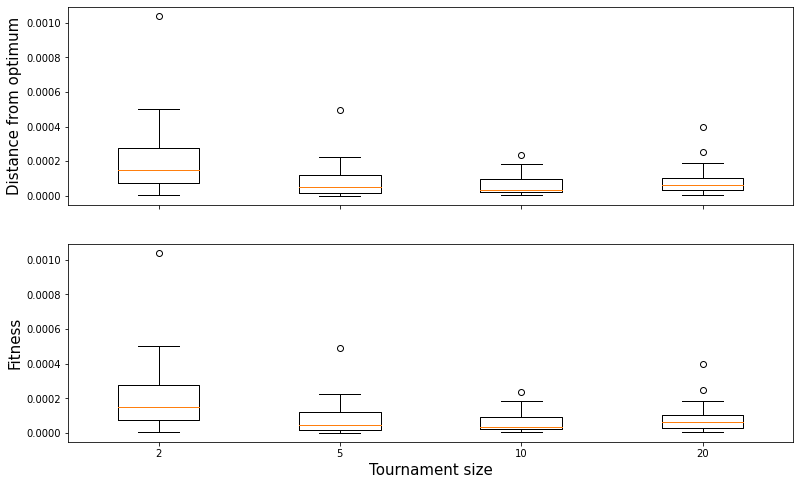

In [11]:
tournament_sizes = [2, 5, 10, 20]

# choose problem
problem_class = benchmarks.Sphere
#problem_class = benchmarks.Rastrigin

# parameters for the GA
args = {}
args["num_vars"] = 2 # Number of dimensions of the search space
args["gaussian_stdev"] = 0.2 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.0 # Crossover fraction
args["mutation_rate"] = 1.0 # fraction of loci to perform mutation on
args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["pop_size"] = 25 # population size
args["pop_init_range"] = [-10, 10] # Range for the initial population
args["max_generations"] = 50 # Number of generations of the GA

num_runs = 30 # Number of runs to be done for each condition
display = False # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'


rng = Random(seed)
    
# run the GA *num_runs* times for each crossover fraction 
# and record results 
results_sphere = asarray([[run_ga(rng, problem_class=problem_class,
                          display=display, 
                          tournament_size=tournament_size,**args)
                   for _ in range(num_runs)]
                   for tournament_size in tournament_sizes],dtype=object)


#print(results)

#print(results.shape) #The result shape is (2,30,3) because we have 2 tournamnet sizes, 30 iterations and 3 scores (individual, fintness, birth-rate) 

best_fitnesses_sphere = [[run_result[1] for run_result in runs] 
                  for runs in results_sphere]

distance_from_global_optimums_sphere = [[sum(asarray(run_result[0],dtype=object) ** 2)
                                    for run_result in runs]
                                    for runs in results_sphere]

fig = figure(figsize = (13,8))
# Boxplot comparing the distance from the global optimum
ax = fig.add_subplot(2,1,1)
ax.boxplot(distance_from_global_optimums_sphere,notch=False)
ax.set_xticklabels([])
#ax.set_xlabel('Tournament size')
ax.set_ylabel('Distance from optimum', fontsize = 15)

# Boxplot comparing the best fitnesses
ax = fig.add_subplot(2,1,2)
ax.boxplot(best_fitnesses_sphere,notch=False)
ax.set_xticklabels(tournament_sizes)
ax.set_xlabel('Tournament size', fontsize = 15)
ax.set_ylabel('Fitness', fontsize= 15 )
show()

The aim of this part is to visulize in a more intuitive way the "state space" distribution of the best individual for each one of the iteration. From the resolution of the 3D plot above it seems that all the tournament sizes give the same results (this is because for each size, all the 30 best individuals reach the global minimum) but looking at the boxplots, it's evident that a "medium-low" tournament size (in this case of size of $5$) achieves a better performance 

In [12]:
def tournament_list_sphere(x, y, z, tournament_index):
    for i in range(num_runs):
        x.append(results_sphere[tournament_index][i][0][0])
        y.append(results_sphere[tournament_index][i][0][1])
        z.append(results_sphere[tournament_index][i][1])
    return x,y,z

In [13]:
x_2_sphere= []
y_2_sphere = []
z_2_sphere = []

x_5_sphere = []
y_5_sphere = []
z_5_sphere = []

x_10_sphere = []
y_10_sphere = []
z_10_sphere= []

x_20_sphere = []
y_20_sphere = []
z_20_sphere = []
    
x_2_sphere, y_2_sphere, z_2_sphere = tournament_list_sphere(x_2_sphere, y_2_sphere, z_2_sphere, 0)
x_5_sphere, y_5_sphere, z_5_sphere = tournament_list_sphere(x_5_sphere, y_5_sphere, z_5_sphere, 1)
x_10_sphere, y_10_sphere, z_10_sphere = tournament_list_sphere(x_10_sphere, y_10_sphere, z_10_sphere, 2)
x_20_sphere, y_20_sphere, z_20_sphere = tournament_list_sphere(x_20_sphere, y_20_sphere, z_20_sphere, 3)

In [14]:
X_sphere = np.linspace(-5, 5, 100)     
Y_sphere = np.linspace(-5, 5, 100)     
X_sphere, Y_sphere = np.meshgrid(X_sphere, Y_sphere) 

Z_sphere = X_sphere**2 + Y_sphere**2

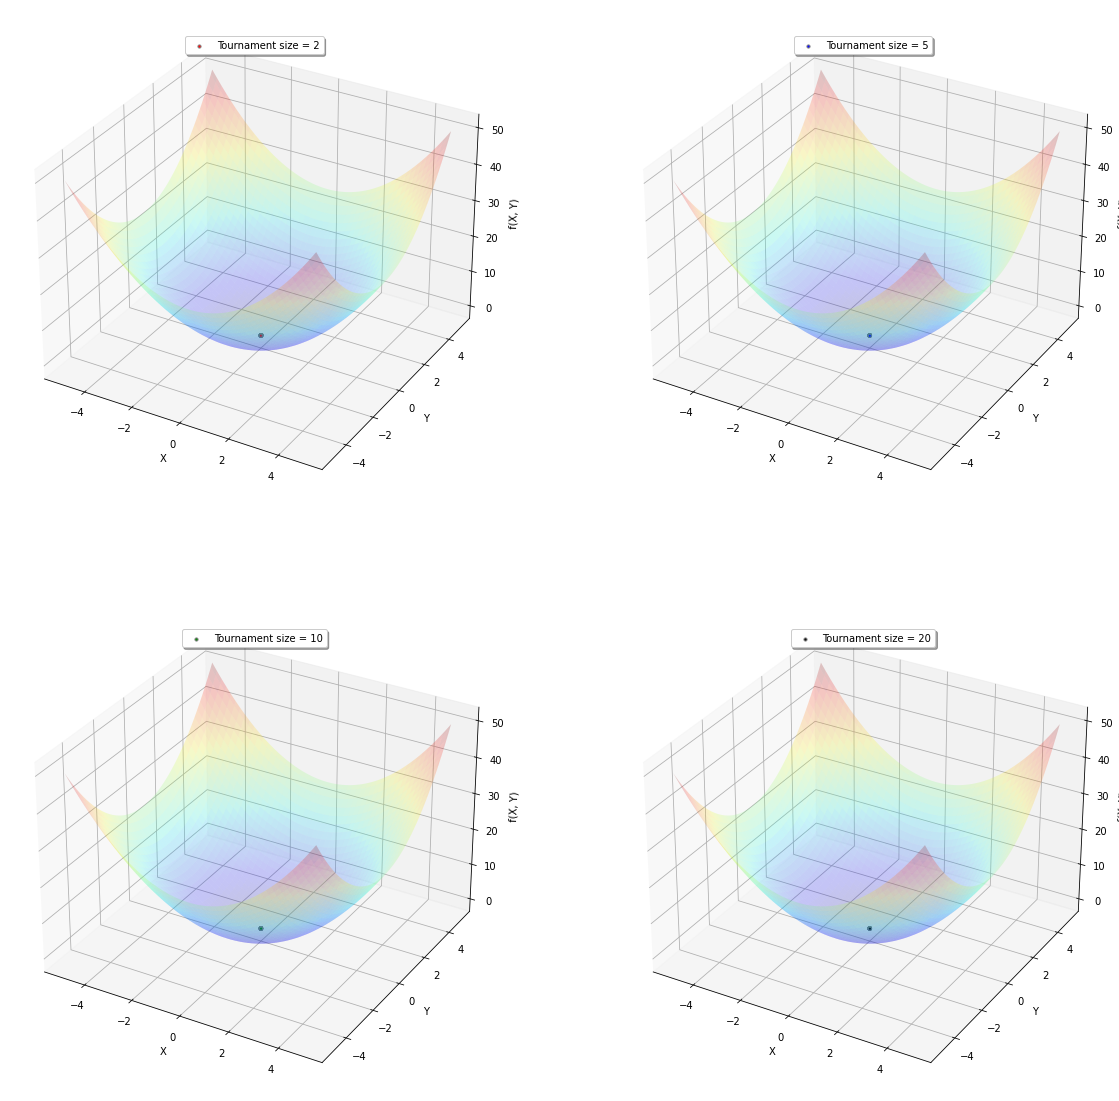

In [18]:
%matplotlib inline

fig = plt.figure(figsize = [20, 20])
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_surface(X_sphere, Y_sphere, Z_sphere, cmap='jet', alpha=0.2)
ax1.scatter(x_2_sphere, y_2_sphere, z_2_sphere, color="red", edgecolor = "grey", s=10,alpha =0.95, label="Tournament size = 2")
ax1.set_xlabel('X', fontsize = 10)
ax1.set_ylabel('Y', fontsize = 10)
ax1.set_zlabel('f(X, Y)', fontsize = 10)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95),fancybox=True, shadow=True, ncol=1)


ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_surface(X_sphere, Y_sphere, Z_sphere, cmap='jet', alpha=0.2)
ax2.scatter(x_5_sphere, y_5_sphere, z_5_sphere, color="blue", edgecolor = "grey", s=10,alpha =0.95, label="Tournament size = 5")
ax2.set_xlabel('X', fontsize = 10)
ax2.set_ylabel('Y', fontsize = 10)
ax2.set_zlabel('f(X, Y)', fontsize = 10)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95),fancybox=True, shadow=True, ncol=1)


ax3 = fig.add_subplot(223, projection='3d')
ax3.plot_surface(X_sphere, Y_sphere, Z_sphere, cmap='jet', alpha=0.2)
ax3.scatter(x_10_sphere, y_10_sphere, z_10_sphere, color="green", edgecolor = "grey", s=10,alpha =0.95, label="Tournament size = 10")
ax3.set_xlabel('X', fontsize = 10)
ax3.set_ylabel('Y', fontsize = 10)
ax3.set_zlabel('f(X, Y)', fontsize = 10)
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95),fancybox=True, shadow=True, ncol=1)



ax4 = fig.add_subplot(224, projection='3d')
ax4.plot_surface(X_sphere, Y_sphere, Z_sphere, cmap='jet', alpha=0.2)
ax4.scatter(x_20_sphere, y_20_sphere, z_20_sphere, color="black", edgecolor = "grey", s=10,alpha =0.95, label="Tournament size = 20")
ax4.set_xlabel('X', fontsize = 10)
ax4.set_ylabel('Y', fontsize = 10)
ax4.set_zlabel('f(X, Y)', fontsize = 10)
ax4.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95),fancybox=True, shadow=True, ncol=1)

### Rastrigin function

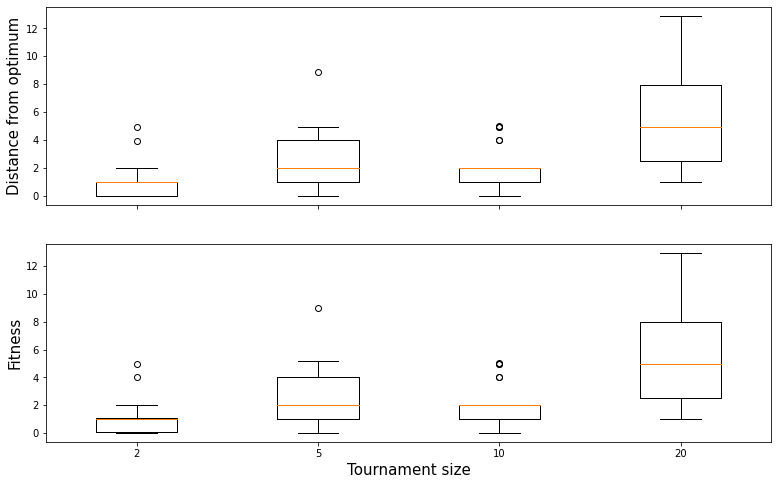

In [23]:
"""   
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

tournament_sizes = [2, 5, 10, 20]

# choose problem
#problem_class = benchmarks.Sphere
problem_class = benchmarks.Rastrigin

# parameters for the GA
args = {}
args["num_vars"] = 2 # Number of dimensions of the search space
args["gaussian_stdev"] = 0.2 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.0 # Crossover fraction
args["mutation_rate"] = 1.0 # fraction of loci to perform mutation on
args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["pop_size"] = 25 # population size
args["pop_init_range"] = [-5.12, 5.12] # Range for the initial population
args["max_generations"] = 50 # Number of generations of the GA

num_runs = 30 # Number of runs to be done for each condition
display = False # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'


rng = Random(seed)
    
# run the GA *num_runs* times for each crossover fraction 
# and record results 
results_rastrigin = asarray([[run_ga(rng, problem_class=problem_class,
                          display=display, 
                          tournament_size=tournament_size,**args)
                   for _ in range(num_runs)]
                   for tournament_size in tournament_sizes],dtype=object)


#print(results)

#print(results.shape) #The result shape is (2,30,3) because we have 2 tournamnet sizes, 30 iterations and 3 scores (individual, fintness, birth-rate) 

best_fitnesses_rastrigin = [[run_result[1] for run_result in runs] 
                  for runs in results_rastrigin]

distance_from_global_optimums_rastrigin = [[sum(asarray(run_result[0],dtype=object) ** 2)
                                    for run_result in runs]
                                    for runs in results_rastrigin]

fig = figure(figsize = (13,8))
# Boxplot comparing the distance from the global optimum
ax = fig.add_subplot(2,1,1)
ax.boxplot(distance_from_global_optimums_rastrigin,notch=False)
ax.set_xticklabels([])
#ax.set_xlabel('Tournament size')
ax.set_ylabel('Distance from optimum', fontsize= 15)

# Boxplot comparing the best fitnesses
ax = fig.add_subplot(2,1,2)
ax.boxplot(best_fitnesses_rastrigin,notch=False)
ax.set_xticklabels(tournament_sizes)
ax.set_xlabel('Tournament size', fontsize= 15)
ax.set_ylabel('Fitness', fontsize= 15)
show()

In [24]:
def tournament_list_rastrigin(x, y, z, tournament_index):
    for i in range(num_runs):
        x.append(results_rastrigin[tournament_index][i][0][0])
        y.append(results_rastrigin[tournament_index][i][0][1])
        z.append(results_rastrigin[tournament_index][i][1])
    return x,y,z

x_2_rastrigin = []
y_2_rastrigin = []
z_2_rastrigin = []

x_5_rastrigin = []
y_5_rastrigin = []
z_5_rastrigin = []

x_10_rastrigin = []
y_10_rastrigin = []
z_10_rastrigin = []

x_20_rastrigin = []
y_20_rastrigin = []
z_20_rastrigin = []
    
x_2_rastrigin, y_2_rastrigin, z_2_rastrigin = tournament_list_rastrigin(x_2_rastrigin, y_2_rastrigin, z_2_rastrigin, 0)
x_5_rastrigin, y_5_rastrigin, z_5_rastrigin = tournament_list_rastrigin(x_5_rastrigin, y_5_rastrigin, z_5_rastrigin, 1)
x_10_rastrigin, y_10_rastrigin, z_10_rastrigin = tournament_list_rastrigin(x_10_rastrigin, y_10_rastrigin, z_10_rastrigin, 2)
x_20_rastrigin, y_20_rastrigin, z_20_rastrigin = tournament_list_rastrigin(x_20_rastrigin, y_20_rastrigin, z_20_rastrigin, 3)

In [25]:
X_rastrigin = np.linspace(-5.12, 5.12, 100)     
Y_rastrigin = np.linspace(-5.12, 5.12, 100)     
X_rastrigin, Y_rastrigin = np.meshgrid(X_rastrigin, Y_rastrigin) 

Z_rastrigin = (X_rastrigin**2 - 10 * np.cos(2 * np.pi * X_rastrigin)) + \
  (Y_rastrigin**2 - 10 * np.cos(2 * np.pi * Y_rastrigin)) + 20


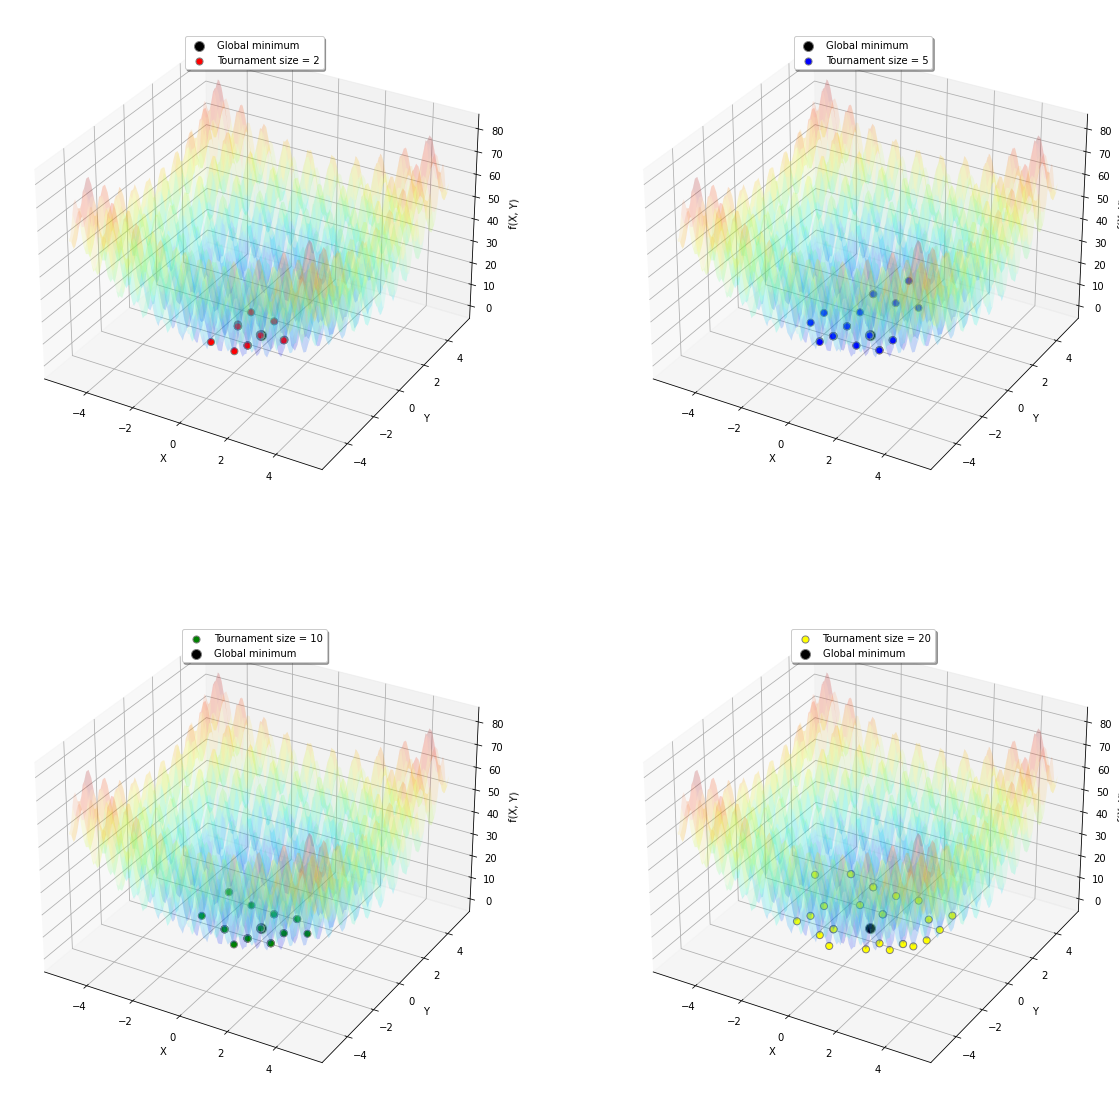

In [41]:
fig = plt.figure(figsize = [20, 20])
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_surface(X_rastrigin, Y_rastrigin, Z_rastrigin, cmap='jet', alpha=0.1)
ax1.scatter(0, 0, 0,  color="black", edgecolor = "grey", s=100 ,alpha =1, label="Global minimum")
ax1.scatter(x_2_rastrigin, y_2_rastrigin, z_2_rastrigin, color="red", edgecolor = "grey", s=50 ,alpha =1, label="Tournament size = 2")
#ax1.scatter(0, 0, 0,  color="black", edgecolor = "grey", s=20 ,alpha =1, label="Global minimum")
ax1.set_xlabel('X', fontsize = 10)
ax1.set_ylabel('Y', fontsize = 10)
ax1.set_zlabel('f(X, Y)', fontsize = 10)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95),fancybox=True, shadow=True, ncol=1)


ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_surface(X_rastrigin, Y_rastrigin, Z_rastrigin, cmap='jet', alpha=0.1)
ax2.scatter(0, 0, 0,  color="black", edgecolor = "grey", s=100 ,alpha =1, label="Global minimum")
ax2.scatter(x_5_rastrigin, y_5_rastrigin, z_5_rastrigin, color="blue", edgecolor = "grey", s=50,alpha =1, label="Tournament size = 5")
ax2.set_xlabel('X', fontsize = 10)
ax2.set_ylabel('Y', fontsize = 10)
ax2.set_zlabel('f(X, Y)', fontsize = 10)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95),fancybox=True, shadow=True, ncol=1)


ax3 = fig.add_subplot(223, projection='3d')
ax3.plot_surface(X_rastrigin, Y_rastrigin, Z_rastrigin, cmap='jet', alpha=0.1)
ax3.scatter(x_10_rastrigin, y_10_rastrigin, z_10_rastrigin, color="green", edgecolor = "grey", s=50,alpha =1, label="Tournament size = 10")
ax3.scatter(0, 0, 0,  color="black", edgecolor = "grey", s=100 ,alpha =1, label="Global minimum")
ax3.set_xlabel('X', fontsize = 10)
ax3.set_ylabel('Y', fontsize = 10)
ax3.set_zlabel('f(X, Y)', fontsize = 10)
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95),fancybox=True, shadow=True, ncol=1)



ax4 = fig.add_subplot(224, projection='3d')
ax4.plot_surface(X_rastrigin, Y_rastrigin, Z_rastrigin, cmap='jet', alpha=0.1)
ax4.scatter(x_20_rastrigin, y_20_rastrigin, z_20_rastrigin, color="yellow", edgecolor = "grey", s=50,alpha =1, label="Tournament size = 20")
ax4.scatter(0, 0, 0,  color="black", edgecolor = "grey", s=100 ,alpha =1, label="Global minimum")
ax4.set_xlabel('X', fontsize = 10)
ax4.set_ylabel('Y', fontsize = 10)
ax4.set_zlabel('f(X, Y)', fontsize = 10)
ax4.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95),fancybox=True, shadow=True, ncol=1)


The tournament size in genetic algorithms refers to the number of individuals that are randomly selected from the population to compete in a tournament for the selection of parents in the genetic operations.


Generally, a larger tournament size provides stronger selection pressure, which can lead to faster convergence and better exploitation of the solution space, but may also decrease diversity and increase the risk of premature convergence to local optima. On the other hand, a smaller tournament size may provide weaker selection pressure, but may also preserve diversity and exploration of the solution space.

# Exercise 4

In this exercise you will run the EA on many test functions commonly used to benchmark optimization algorithms. Run the EA on some of the test functions shown in the comments of the next cell (especially the multimodal functions) and adapt the mutation magnitude, crossover rate, selection pressure, and population size so as to get the best results. If you run the code as provided it will initialize and bound the values of your population vectors to suitable ranges. You may comment/uncomment certain lines to alter this behavior. See the comments in the enxt cell for further details. 

You may first try the 1D or 2D case, which has the advantage that the fitness landscape can be visualized. However, keep in mind that sometimes the resolution of the plot is not sufficient to accurately represent a function.

- Do you see a different algorithmic behavior when you test the EA on different benchmark functions? Why?
- What is the effect of changing the number of variables on each tested function?


---
[1]:
See __[link](https://pythonhosted.org/inspyred/reference.html\#single-objective-benchmarks)__ for a list of single-objective benchmark problems.

## Rosenbrock 2D

Best Individual [1.08502355 1.1767013 ]
Best Fitness 0.0072620424652344445


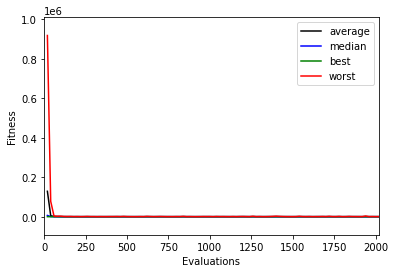

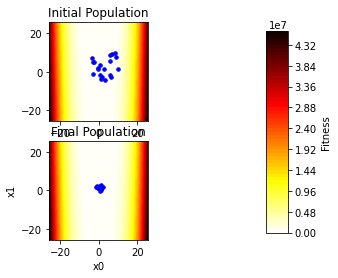

In [42]:
from pylab import *
from random import Random
from utils.utils_02.ga import run_ga
from inspyred import benchmarks
import sys

"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

# parameters for the GA
args = {}
args["num_vars"] = 2 # Number of dimensions of the search space
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 
args["pop_size"] = 20 # population size

args["num_elites"] = 2 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on


args["use_bounder"] = True 
args["pop_init_range"] = [-5, 10]

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

# choose problem
problem_class = benchmarks.Rosenbrock

args["fig_title"] = 'GA'

rng = Random(seed)
best_individual_rosenbrock, best_fitness_rosenbrock, final_pop_rosenbrock = run_ga(rng, display=display,
                                       problem_class=problem_class,**args)
print("Best Individual", best_individual_rosenbrock)
print("Best Fitness", best_fitness_rosenbrock)

if display :
    ioff()
    show()

In [43]:
x_rosenbrock = []
y_rosenbrock = []
z_rosenbrock = []

for i in range(len(final_pop_rosenbrock)):
    x_rosenbrock.append(final_pop_rosenbrock[i].candidate[0])
    y_rosenbrock.append(final_pop_rosenbrock[i].candidate[1])
    z_rosenbrock.append(final_pop_rosenbrock[i].fitness)
    

In [44]:
def Rosenbrock(X,Y): 
    return 100*(Y-X**2)**2+(X-1)**2

X = np.linspace(-5, 10, 100)     
Y = np.linspace(-5, 10, 100)     
X, Y = np.meshgrid(X, Y) 

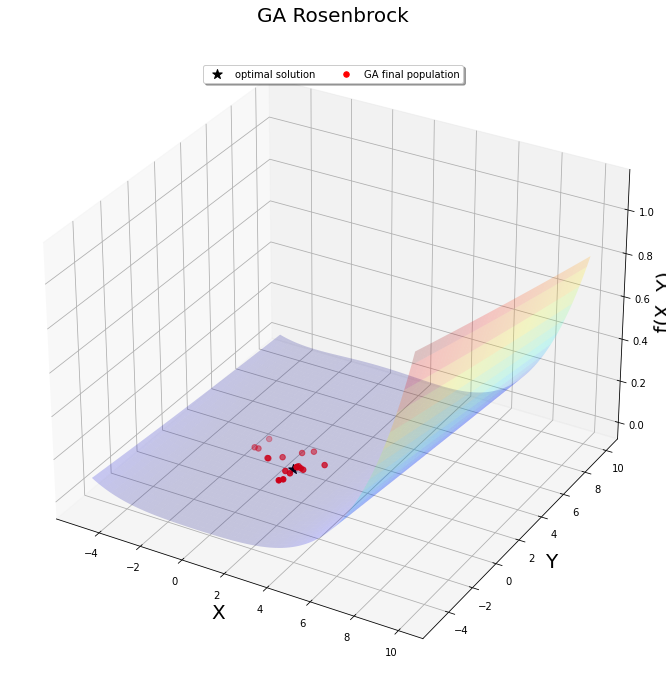

In [47]:
%matplotlib inline
def plotter_rosenbrock():
  fig = plt.figure(figsize = [12, 12])
  ax = plt.axes(projection='3d')
  ax.plot_surface(X, Y, Rosenbrock(X, Y), cmap='jet', alpha=0.2)
  ax.scatter(1,1,0, color = "black", marker = "*", s = 100, label = "optimal solution")
  ax.scatter(x_rosenbrock, y_rosenbrock, z_rosenbrock, color = "red", s = 30, label = "GA final population")
  #ax.view_init(elev=E, azim=A)
  ax.set_xlabel('X', fontsize = 20)
  ax.set_ylabel('Y', fontsize = 20)
  ax.set_zlabel('f(X, Y)', fontsize = 20)
  ax.set_title("GA Rosenbrock", fontsize = 20)
  ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), fancybox=True, shadow=True, ncol=4)
  plt.show()
    
plotter_rosenbrock()

# Griewank 2D

Best Individual [ 3.14220878 -4.43119403]
Best Fitness 0.00741158639016315


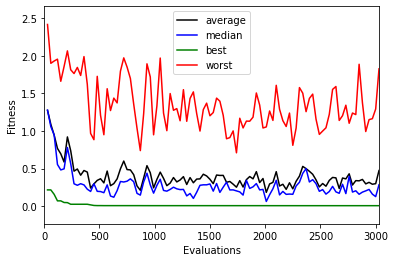

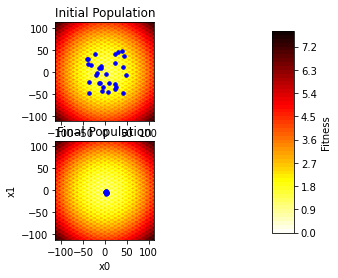

In [48]:
# parameters for the GA
args = {}
args["num_vars"] = 2 # Number of dimensions of the search space
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 
args["pop_size"] = 30 # population size

args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on


args["use_bounder"] = True 
args["pop_init_range"] = [-50, 50]

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

# choose problem
problem_class = benchmarks.Griewank



"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'

rng = Random(seed)
best_individual_griewank, best_fitness_griewank, final_pop_griewank = run_ga(rng, display=display,
                                       problem_class=problem_class,**args)
print("Best Individual", best_individual_griewank)
print("Best Fitness", best_fitness_griewank)

if display :
    ioff()
    show()

In [49]:
x_griewank = []
y_griewank = []
z_griewank = []

for i in range(len(final_pop_griewank)):
    x_griewank.append(final_pop_griewank[i].candidate[0])
    y_griewank.append(final_pop_griewank[i].candidate[1])
    z_griewank.append(final_pop_griewank[i].fitness)

In [50]:
def Griewank(X,Y): 
    return (X**2 + Y**2)/4000 - (np.cos(X / (2**(1/2)))* np.cos(X / (3**(1/2)))) +1

X = np.linspace(-100, 100, 1000)     
Y = np.linspace(-100, 100, 1000)     
X, Y = np.meshgrid(X, Y)
#Z = Griewank(X,Y)

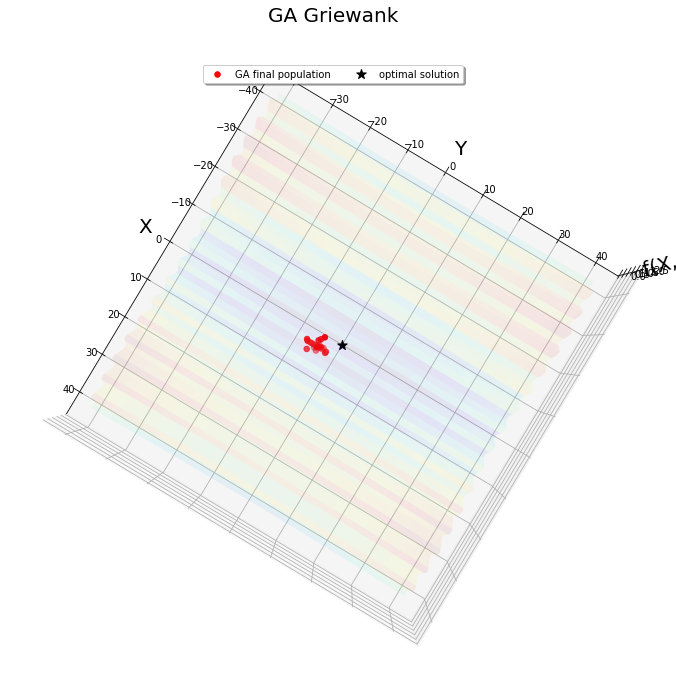

In [79]:
%matplotlib inline
def plotter_griewank():
  fig = plt.figure(figsize = [12, 12])
  ax = plt.axes(projection='3d')
  ax.plot_surface(X, Y, Griewank(X, Y), cmap='jet', alpha=0.07)
  #ax.scatter(1,1,0, color = "black", marker = "*", s = 100, label = "optimal solution")
  ax.scatter(x_griewank, y_griewank, z_griewank, color = "red", s = 30, label = "GA final population")
  #ax.plot_wireframe(X, Y, Griewank(X, Y), color='gray', linewidth=0.2)
  ax.set_xlabel('X', fontsize = 20)
  ax.set_ylabel('Y', fontsize = 20)
  ax.set_zlabel('f(X, Y)', fontsize = 20)
  ax.set_title("GA Griewank", fontsize = 20)
  ax.scatter(0,0,0, color = "black", marker = "*", s = 100, label = "optimal solution")

  ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), fancybox=True, shadow=True, ncol=4)
  ax.view_init(elev=90, azim=30) #metter elev = 90 per vedere dall'alto
  plt.show()

plotter_griewank()

# Ackley  2D

Best Individual [-0.00212853 -0.00212838]
Best Fitness 0.008755092019729904


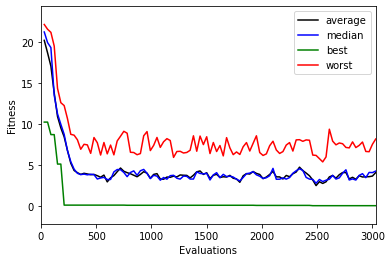

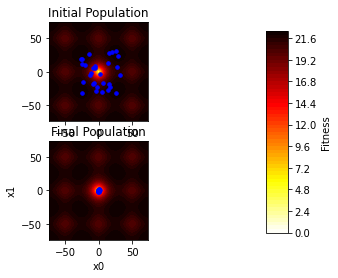

In [73]:
# parameters for the GA
args = {}
args["num_vars"] = 2 # Number of dimensions of the search space
args["gaussian_stdev"] = 1.0 # Standard deviation of the Gaussian mutations
args["crossover_rate"]  = 0.8 # Crossover fraction
args["tournament_size"] = 2 
args["pop_size"] = 30 # population size

args["num_elites"] = 1 # number of elite individuals to maintain in each gen
args["mutation_rate"] = 0.5 # fraction of loci to perform mutation on


args["use_bounder"] = True 
args["pop_init_range"] = [-32.768, 32.768]

args["max_generations"] = 100 # Number of generations of the GA
display = True # Plot initial and final populations

# choose problem
problem_class = benchmarks.Ackley



"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'

rng = Random(seed)
best_individual_ackley, best_fitness_ackley, final_pop_ackley = run_ga(rng, display=display,
                                       problem_class=problem_class,**args)
print("Best Individual", best_individual_ackley)
print("Best Fitness", best_fitness_ackley)

if display :
    ioff()
    show()

In [74]:
x_ackley = []
y_ackley = []
z_ackley = []

for i in range(len(final_pop_ackley)):
    x_ackley.append(final_pop_ackley[i].candidate[0])
    y_ackley.append(final_pop_ackley[i].candidate[1])
    z_ackley.append(final_pop_ackley[i].fitness)

In [75]:
def Ackley(x, y):
    return -20.0 * exp(-0.2 * ((0.5 * (X**2 + Y**2))))**(1/2) - exp(0.5 * (cos(2 * pi * X) + cos(2 * pi * Y))) + e + 20

X = np.linspace(-40, 40, 100)     
Y = np.linspace(-40, 40, 100)     
X, Y = np.meshgrid(X, Y)

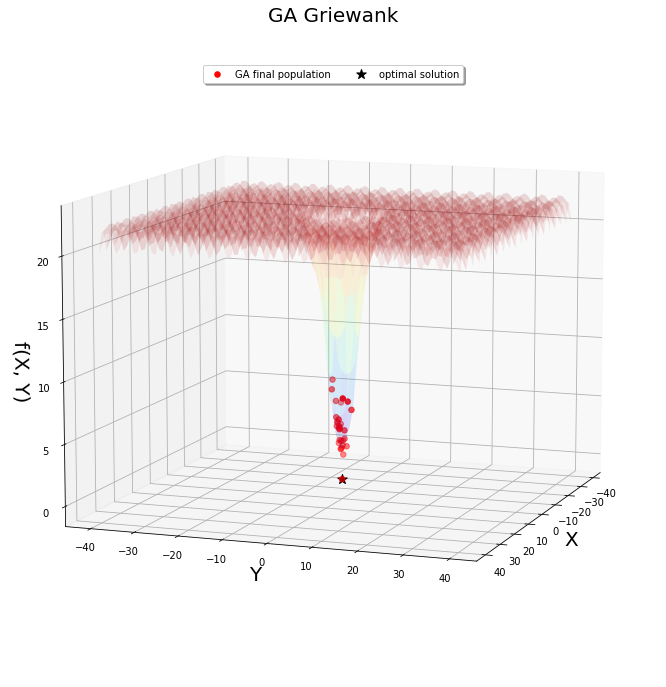

In [76]:
%matplotlib inline
def plotter_griewank():
  fig = plt.figure(figsize = [12, 12])
  ax = plt.axes(projection='3d')
  ax.plot_surface(X, Y, Ackley(X, Y), cmap='jet', alpha=0.07)
  #ax.scatter(1,1,0, color = "black", marker = "*", s = 100, label = "optimal solution")
  ax.scatter(x_ackley, y_ackley, z_ackley, color = "red", s = 30, label = "GA final population")
  #ax.plot_wireframe(X, Y, Griewank(X, Y), color='gray', linewidth=0.2)
  ax.set_xlabel('X', fontsize = 20)
  ax.set_ylabel('Y', fontsize = 20)
  ax.set_zlabel('f(X, Y)', fontsize = 20)
  ax.set_title("GA Griewank", fontsize = 20)
  ax.scatter(0,0,0, color = "black", marker = "*", s = 100, label = "optimal solution")

  ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), fancybox=True, shadow=True, ncol=4)
  ax.view_init(elev=10, azim=20)
  plt.show()

plotter_griewank()